findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

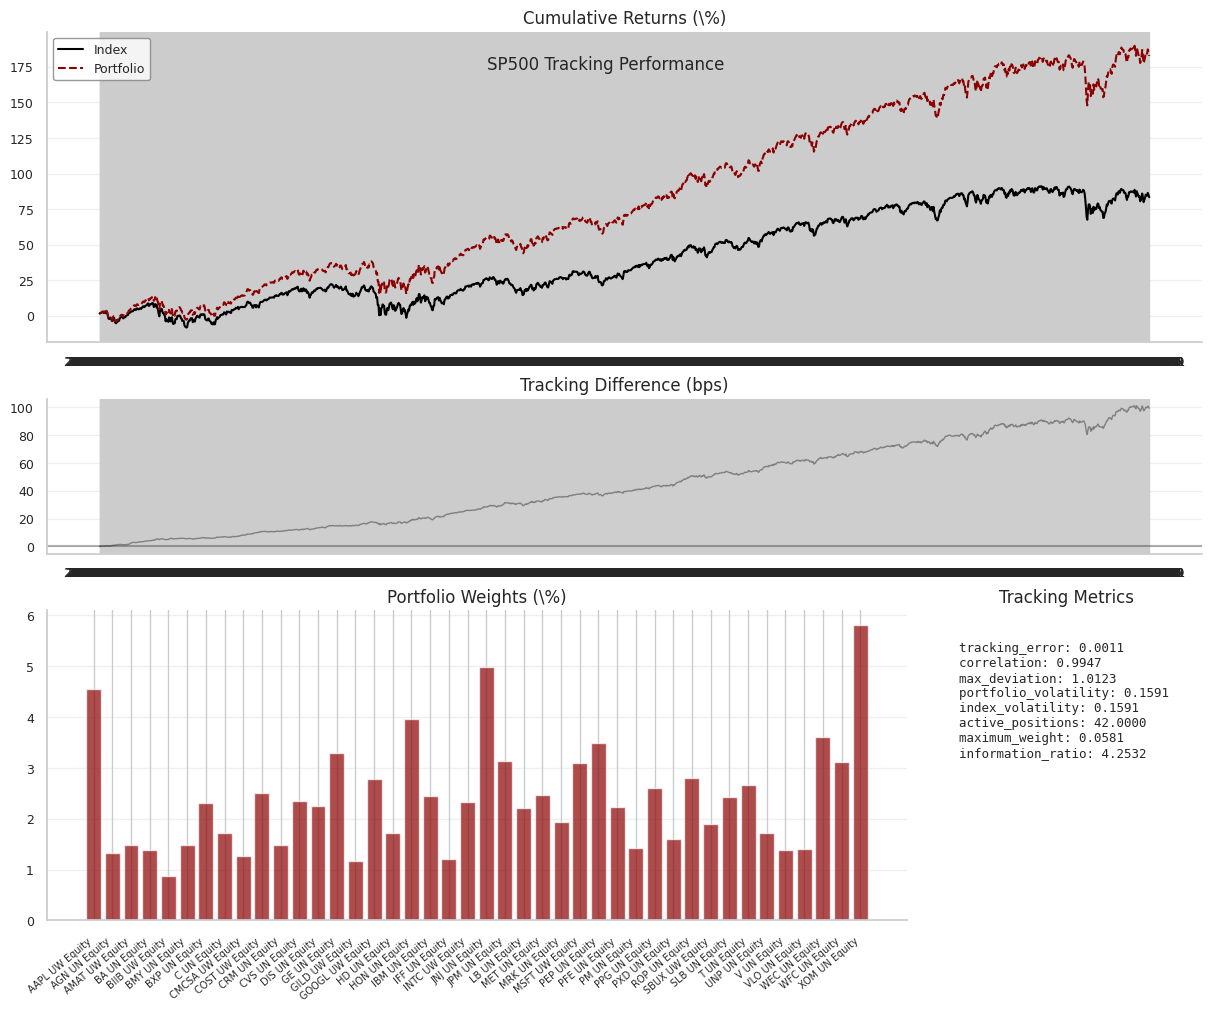

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

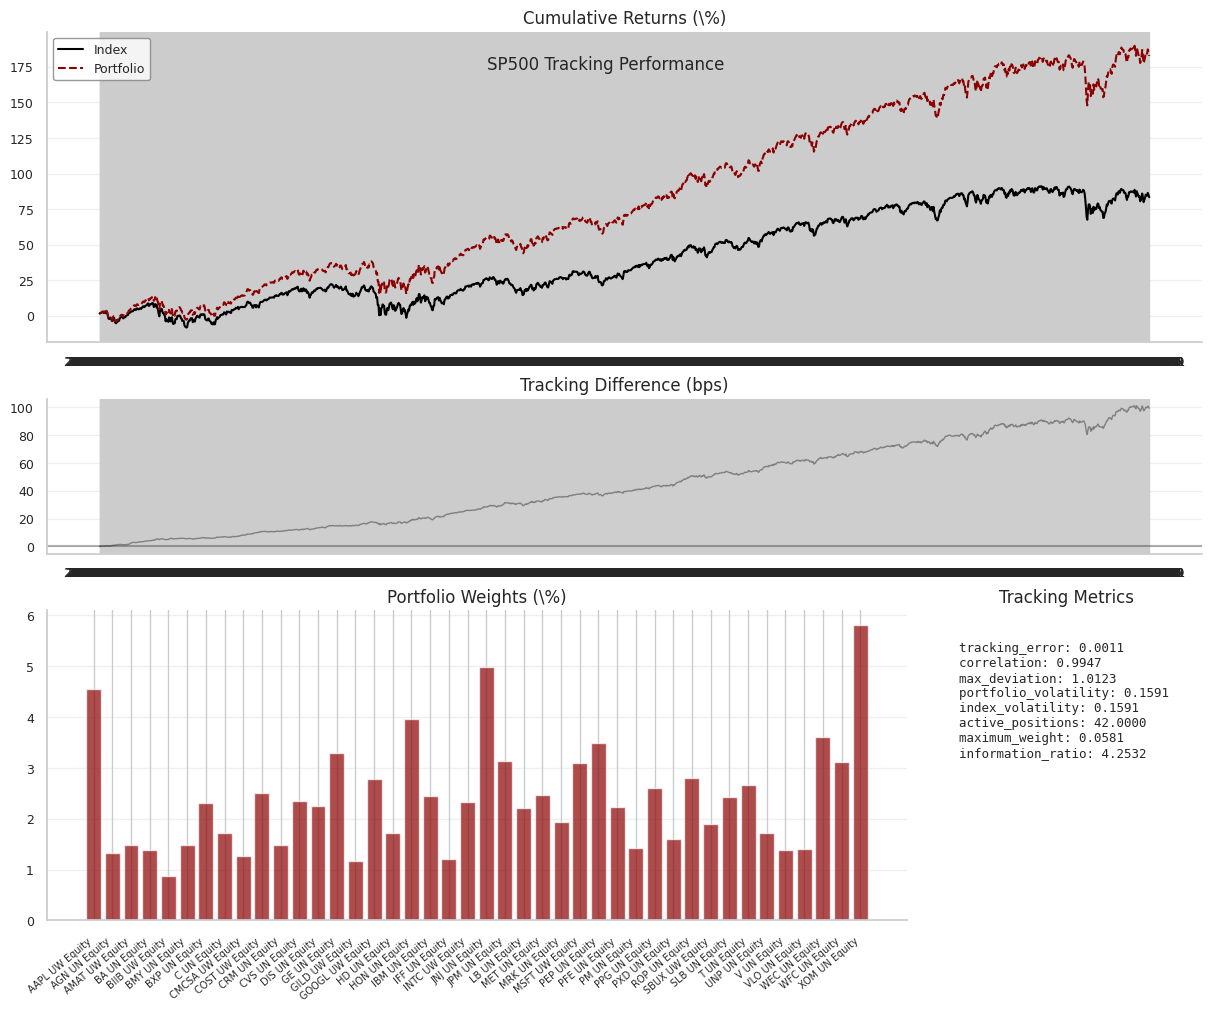

In [1]:
import polars as pl
from replicate.data.loading import DataLoader
from replicate.optimizers.mm import MMOptimizer
from replicate.evaluation.metrics import TrackingMetrics
from replicate.evaluation.visualizer import TrackingVisualizer

# Initialize loader and optimizer
loader = DataLoader()
optimizer = MMOptimizer(measure='dr')  # or 'hete' for heteroskedastic version

# Load SP500 data
returns_lf, features_lf = loader.load_data(
    data_type=DataLoader.SP500_2010_2015,
    start_date="2010-01-01",
    end_date="2016-01-01"
)

# Convert to numpy for optimization
X = features_lf.drop('Date').collect().to_numpy()
r = returns_lf.drop('Date').collect().to_numpy().flatten()
dates = returns_lf.select('Date').collect().to_numpy().flatten()

# Get feature names for visualization
feature_names = [c for c in features_lf.collect_schema().names() if c != 'Date']

# Optimize weights
result_dict = optimizer.optimize(
    X, r,
    lambda_=1e-7,  # sparsity parameter
    u=0.5,         # upper bound on weights
    p_neg_exp=7,   # controls sparsity search
    thres=2e-2,    # minimum weight threshold
    max_iter=1000
)

weights = result_dict['weights']

# Calculate metrics
metrics = TrackingMetrics.calculate_metrics(
    X @ weights,  # predicted returns
    r,           # actual returns
    weights
)

# Visualize results
TrackingVisualizer.plot_tracking_analysis(
    dates,
    X @ weights,
    r,
    weights,
    feature_names,
    metrics=metrics,
    title="SP500 Tracking Performance"
)

In [6]:
returns_lf.collect()

ColumnNotFoundError: unable to find column "timestamp"; valid columns: ["SP500", "Date"]